In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from cycifsuite.get_data import read_synapse_file
from tma_analysis_functions import check_roi

In [2]:
# clustering all wells
path = 'N:/HiTS Projects and Data/Personal/Jake/mgh_tma/processed_data'
os.chdir(path)
expr = pd.read_hdf('index_corrected_tma_expr_data.hdf')
metadata = pd.read_csv('index_corrected_tma_metadata.csv',index_col=0)
channel_info = pd.read_csv(read_synapse_file('syn18555930'),index_col=0).stack()
metadata['group_id'] = metadata.Plate + '_' + metadata.ROI.astype(str)
colnames = channel_info.values
expr.columns = colnames
valid_cells = metadata[metadata.labeled_as_lost=='No'].index
valid_cols = [x for x in colnames if 'DNA' not in x]
expr = expr.reindex(valid_cells)[valid_cols]
metadata = metadata.loc[valid_cells]
print(expr.columns)

Welcome, Yunguan Wang!

Index(['A488', 'A555', 'A647', 'Rb', 'pCTD', 'CDK4', 'CK8-FITC', 'pRB', 'aSMA',
       'CD4', 'CD45-PE', 'PD1', 'CycD1', 'FOXP3-570', 'CD8a', 'EGFR',
       'Ki67-570', 'PDL1', 'Ecad', 'Vimentin', 'CK5', 'Bax', 'gH2ax-PE',
       'Bcl2|CycA2', 'pERK', 'E2F1', 'pAKT', 'B-Catenin', 'FOXO1a', 'p21',
       'p53', 'ER-568', 'AKT'],
      dtype='object')


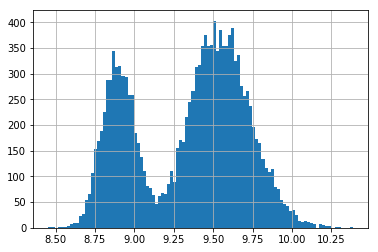

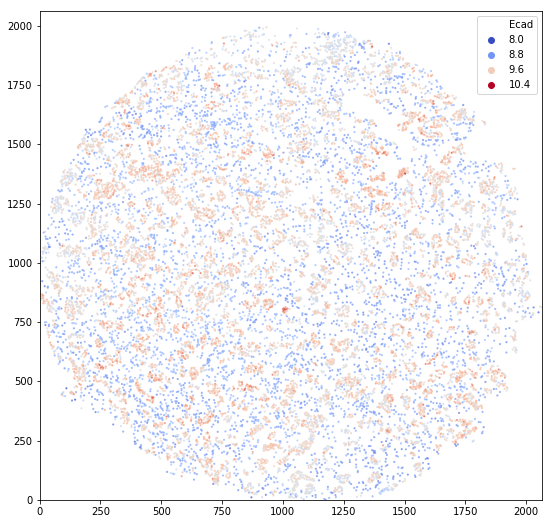

In [3]:
_ = check_roi(expr, metadata, 'TMA1_3', True)

## check marker distribution of the first plate

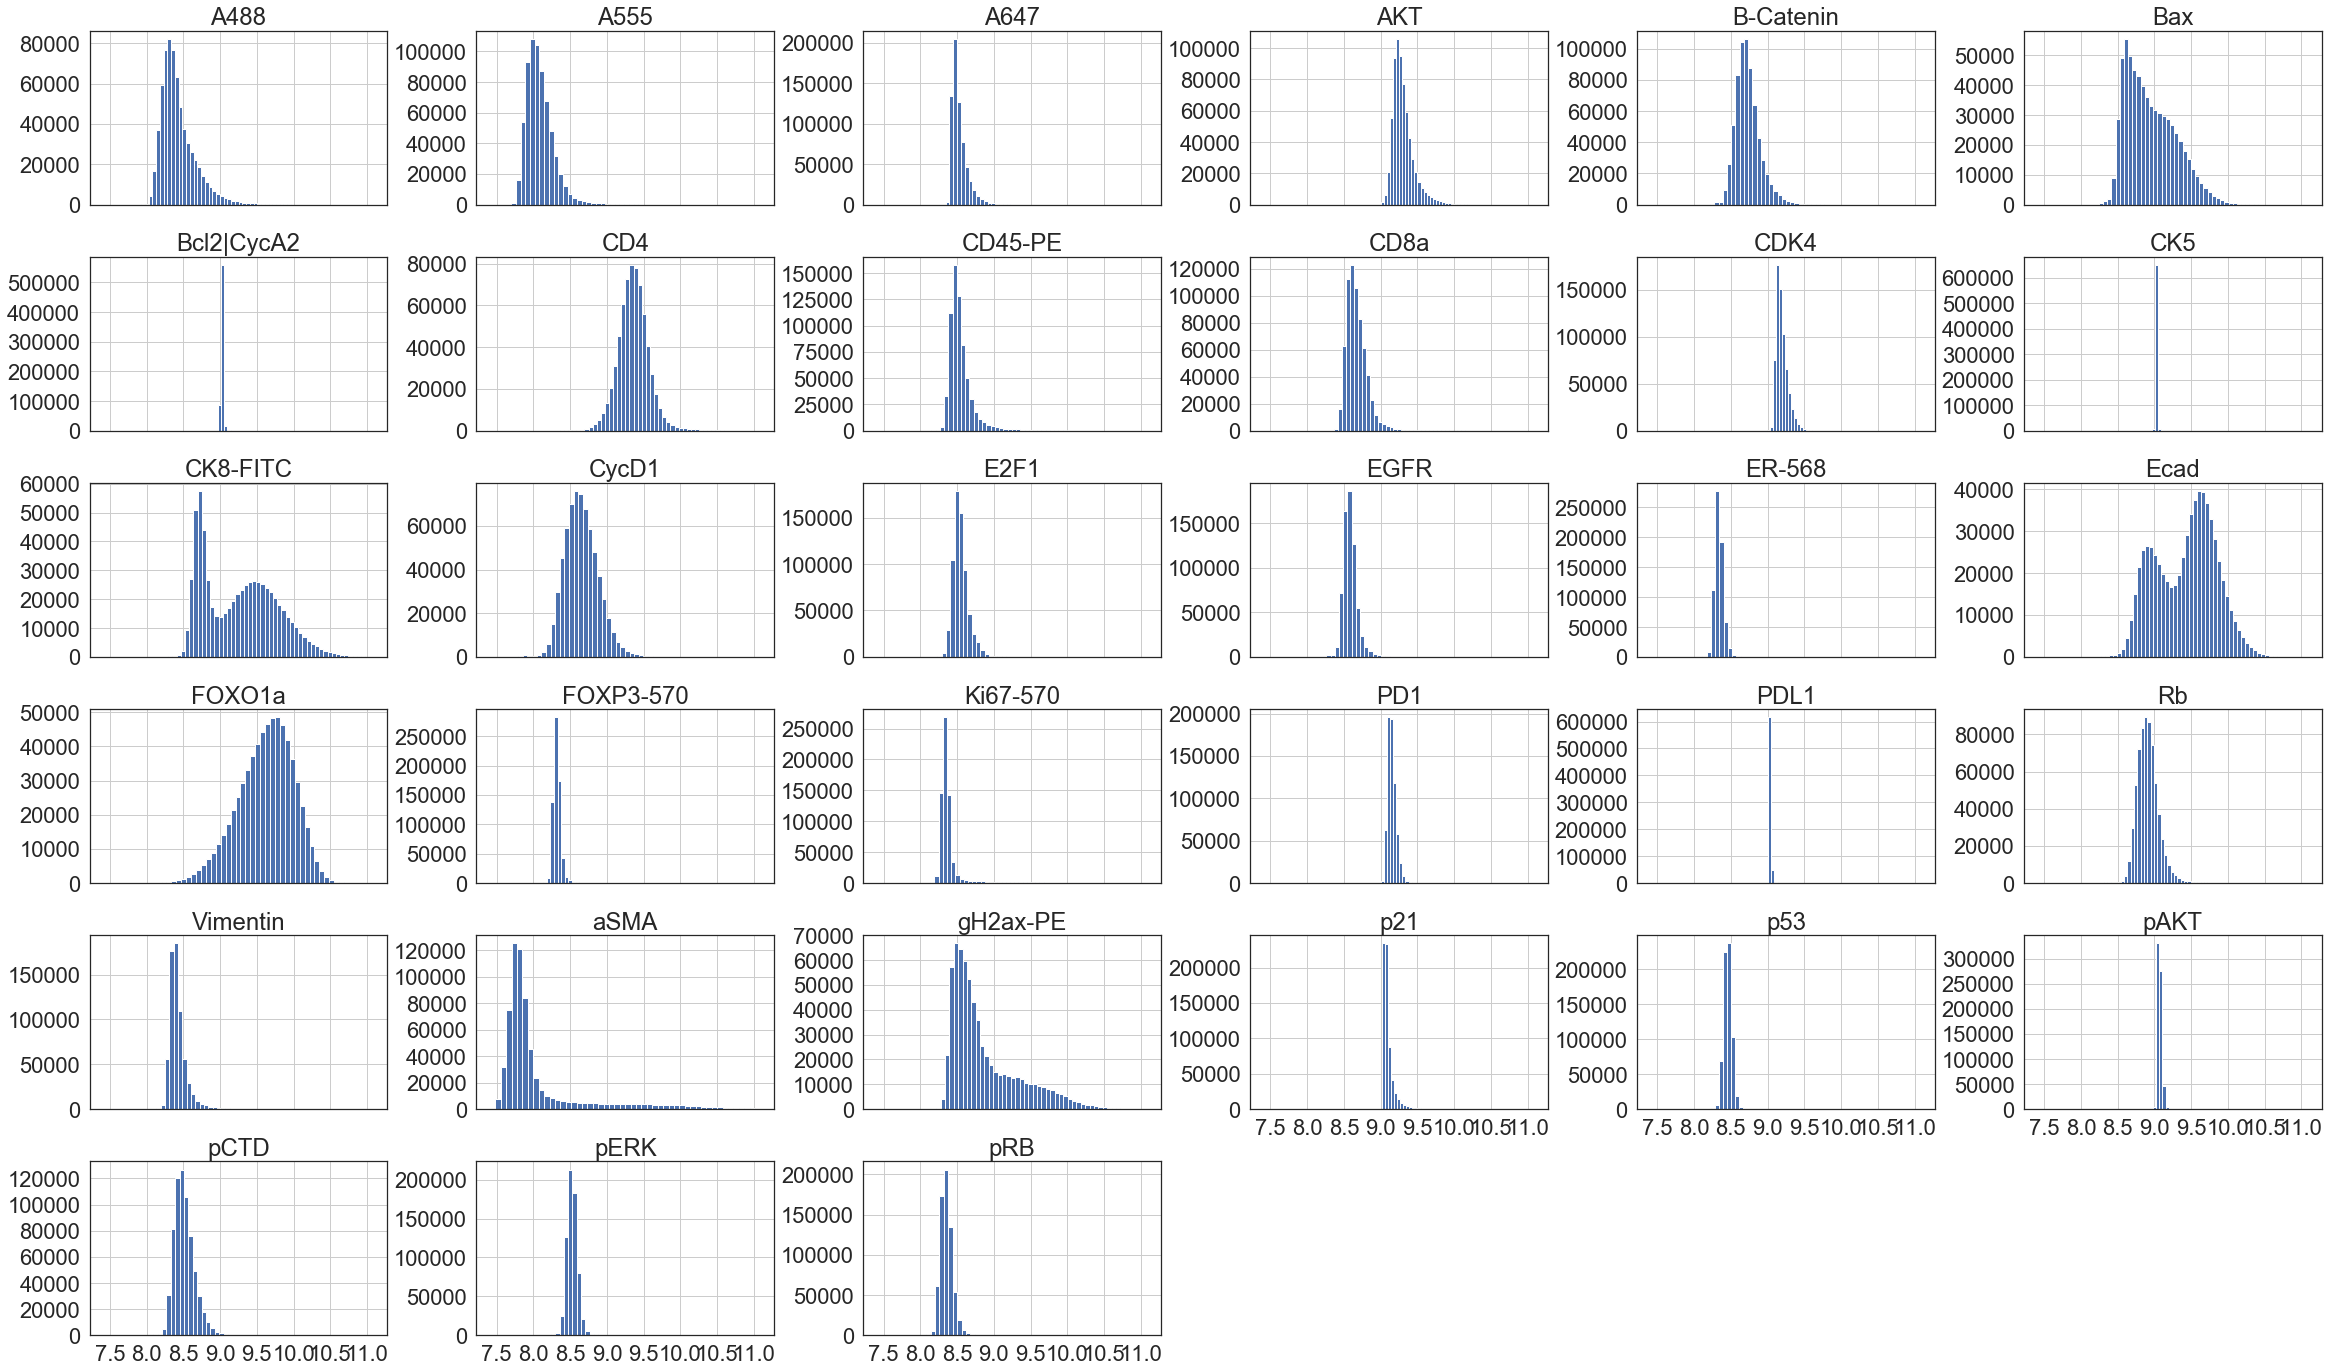

In [4]:
# check channel expression distribution
plate1_idx = metadata[(metadata.Plate=='TMA1')&(metadata.labeled_as_lost=='No')][['ROI']].index
plot_data = expr.loc[plate1_idx]
sns.set(font_scale=2, style='white')
_ = plot_data.hist(bins=50, figsize=(40,24), sharex=True)
sns.set(font_scale=1, style='white')